In [1]:
from scripts.halo_analysis_scripts import *
%matplotlib inline

In [75]:
def plot_mass_fraction(particle_types_num=[0], flabel='gas', ylim=(-2.0,1.0), legendFlag=True, particle_types=[0,1,2,4,5], zbinwidth = 0.5, rbins=np.power(10, np.arange(np.log10(0.005258639741921723), np.log10(3), 0.05))):
    rmid = (rbins[:-1]+rbins[1:])/2 #in units of Rvir
    
    fig, axes = plt.subplots(1, 5, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*5,4.8*1], dpi=150, facecolor='w')
    cmaps = {'h206':plt.cm.Blues, 'h29':plt.cm.Greens, 'h113':plt.cm.Reds, 'h2':plt.cm.Purples}
    indices = {'h206':0, 'h29':1, 'h113':2, 'h2':3}

    for halo, snapdir in Quest_sims['nofb'].items():
        cmap = cmaps[halo]
        simname = os.path.basename(snapdir)
        allprofiles = h5todict(f'data/{simname}_allprofiles_widezbins.h5')

        cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

        for z0, c in zip( sorted(allprofiles.keys()), cmap(np.linspace(0.1,1,len(allprofiles.keys())))[::-1] ):
            fbarr = []
            for k in allprofiles[z0].keys():
                totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
                nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
                with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
                fbarr.append(fb)
            z0n = float(z0.split('z0_')[1])
            axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
            axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)
            assert np.array_equal(allprofiles[z0][k]['rmid'], rmid)

        if legendFlag: axes[indices[halo]+1].legend(loc=4)
        axes[indices[halo]+1].set_title(simname)

    for ax in axes: ax.axhline(0, ls='--', c='k', zorder=-1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0].set_ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
    axes[0].set_ylim(ylim)

/tmp/ipykernel_21682/431126959.py:23: RuntimeWarning: divide by zero encountered in log10
  axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
/tmp/ipykernel_21682/431126959.py:24: RuntimeWarning: divide by zero encountered in log10
  axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)


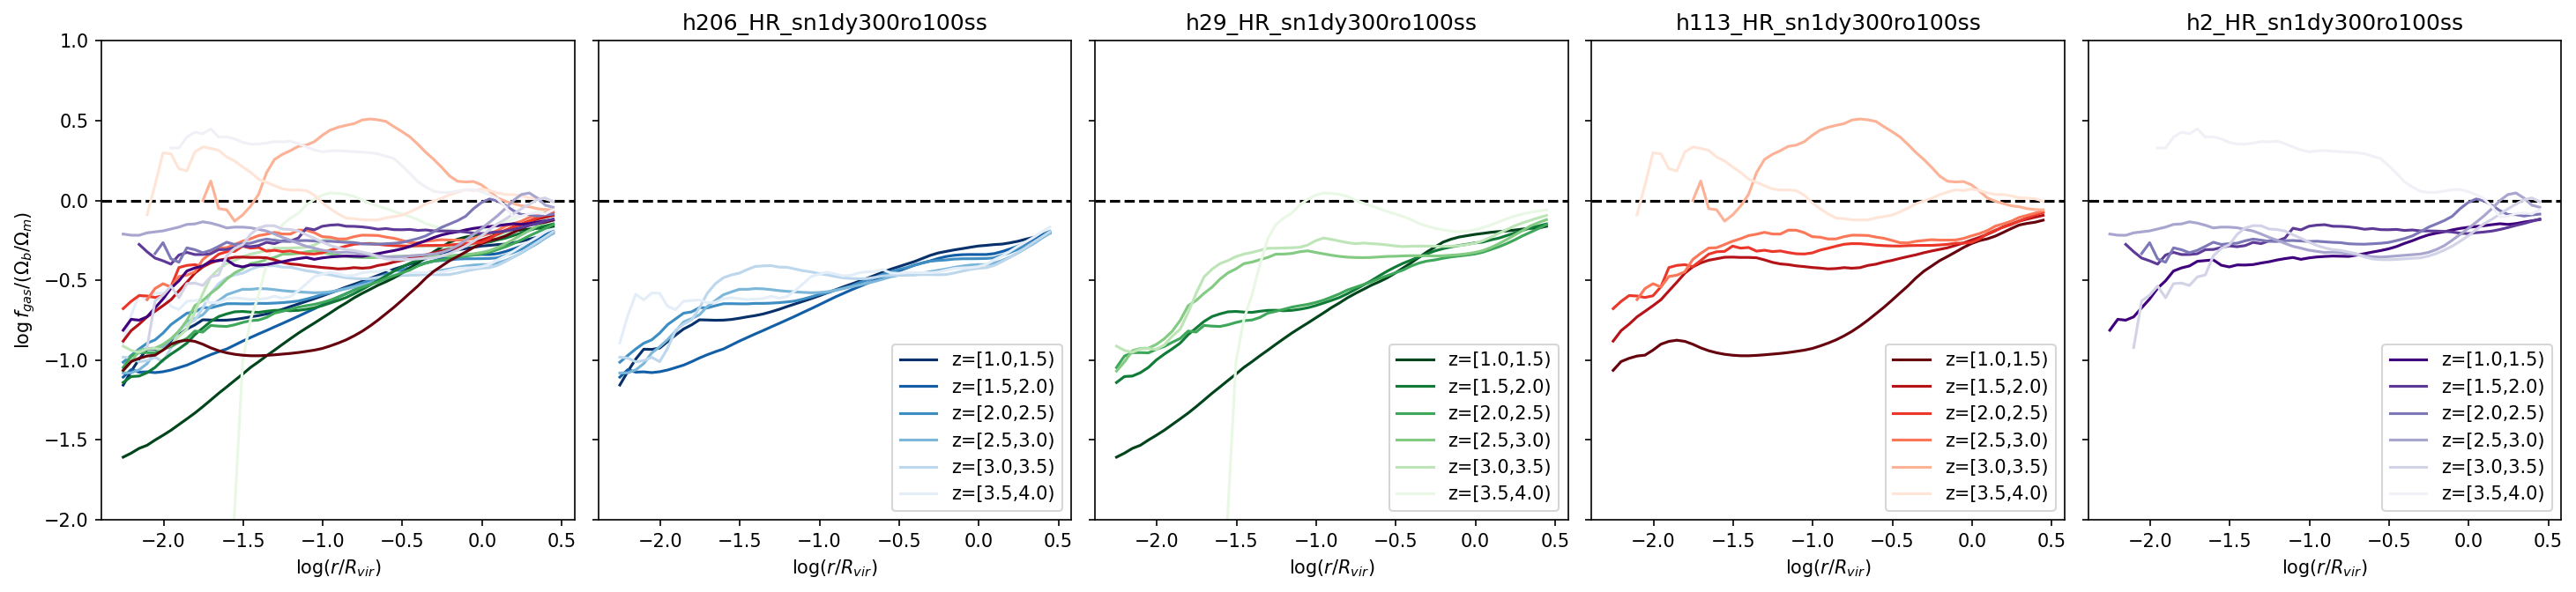

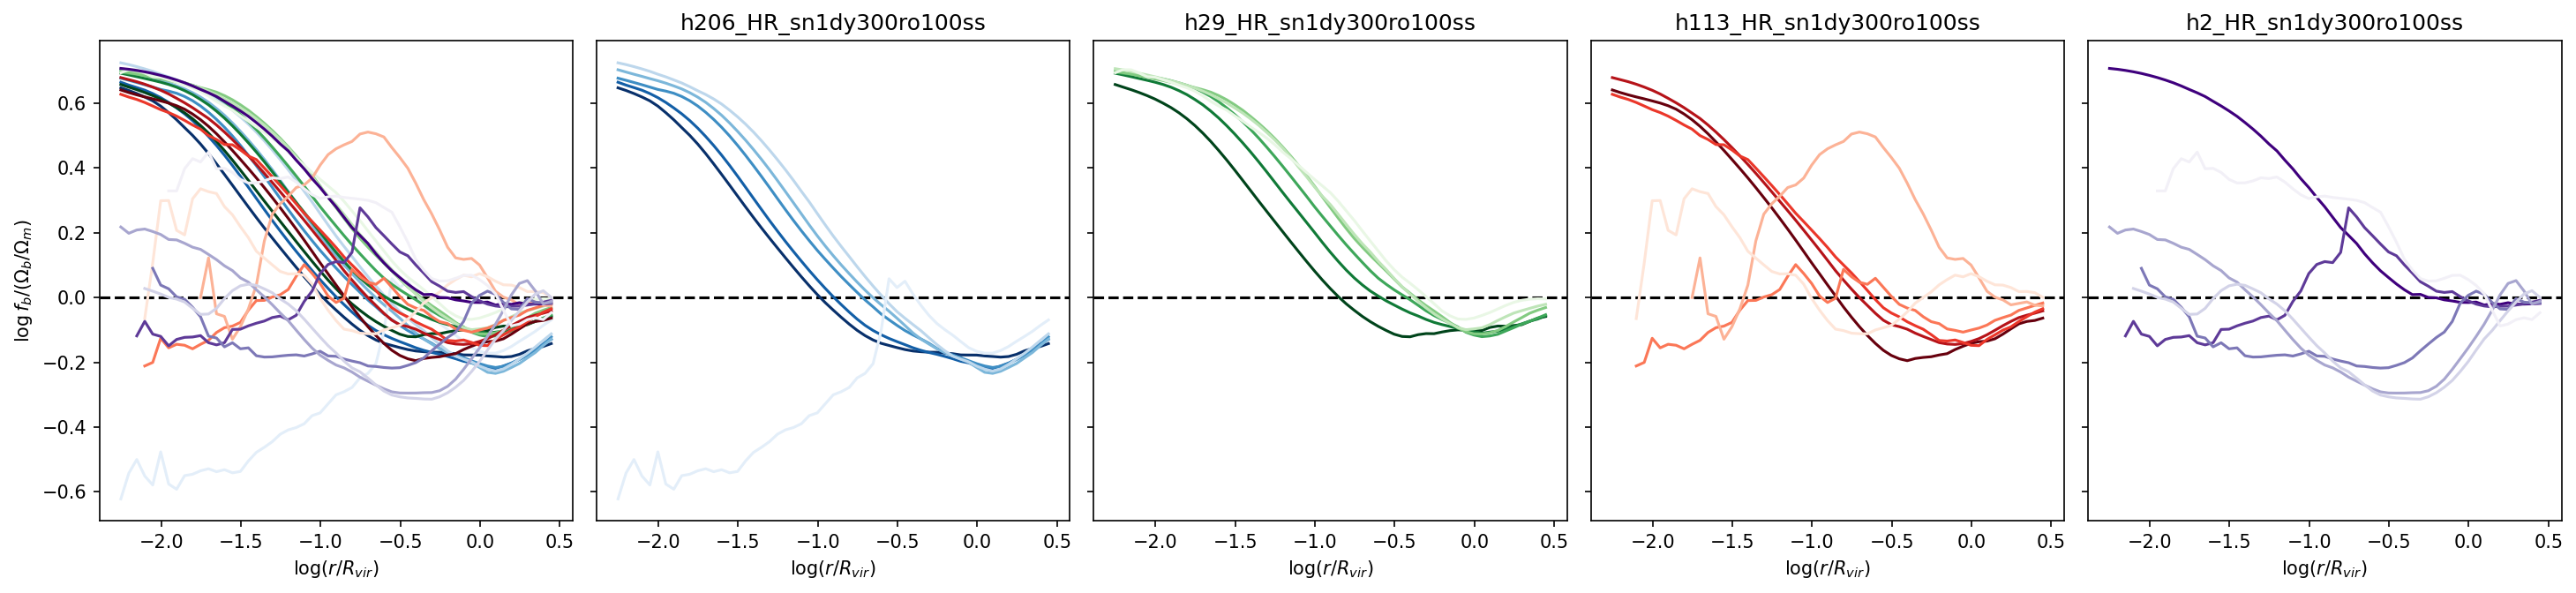

In [76]:
plot_mass_fraction()
plot_mass_fraction([0,4], 'b', None, False)

In [2]:
halos = sorted([f.split('_allprofiles_widezbins.h5')[0] for f in os.listdir('data') if 'allprofiles_widezbins.h5' in f])

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

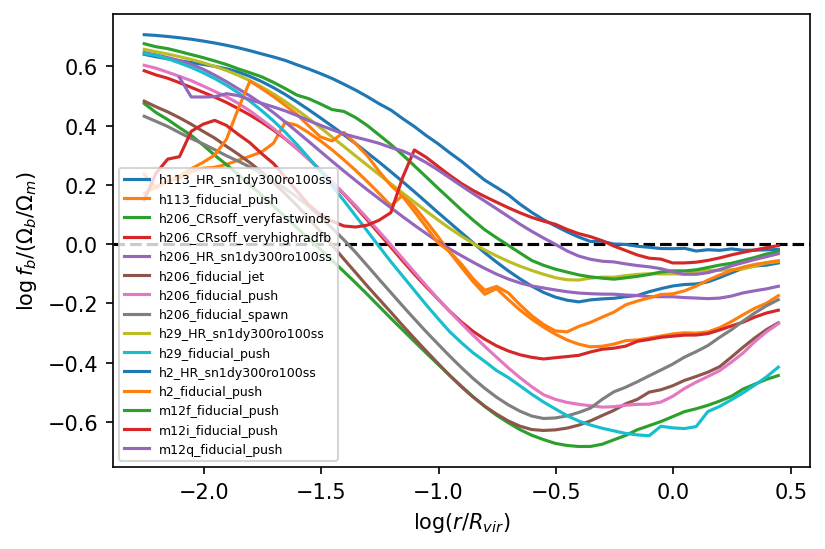

In [3]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), label=f'{halo}')
plt.legend(prop={'size': 6})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

In [4]:
allprofiles[z0][k]['rmid'][39], allprofiles[z0][k]['rmid'][45], allprofiles[z0][k]['rmid'][51], allprofiles[z0][k]['rmid'][54]

(0.49727036726083473,
 0.9921848241462757,
 1.979668989103084,
 2.7963567730334766)

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

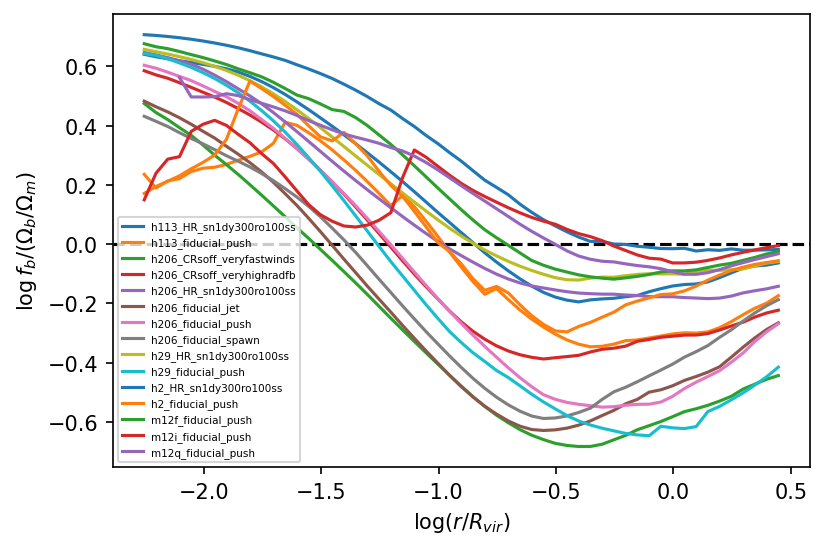

In [5]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

fb_05 = []
fb_1 = []
fb_2 = []
fb_3 = []

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    fbarr = np.median(fbarr, axis=0)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(fbarr), label=f'{halo}')
    fb_05.append(fbarr[39])
    fb_1.append(fbarr[45])
    fb_2.append(fbarr[51])
    fb_3.append(fbarr[54])
plt.legend(prop={'size': 5})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

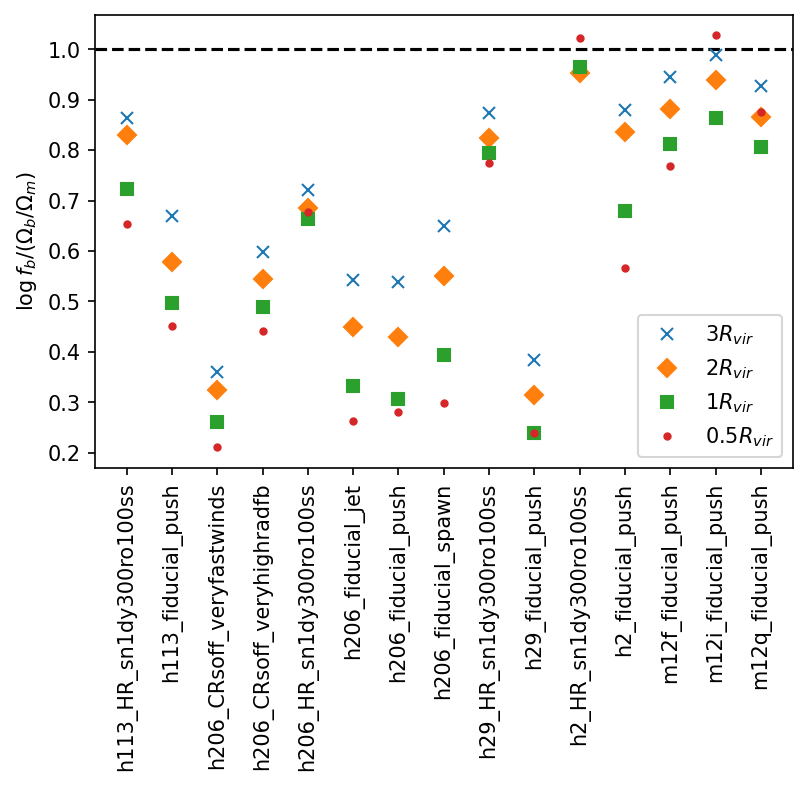

In [8]:
plt.figure(dpi=150)

plt.plot(fb_3, 'x', label='$3 R_{vir}$')
plt.plot(fb_2, 'D', label='$2 R_{vir}$')
plt.plot(fb_1, 's', label='$1 R_{vir}$')
plt.plot(fb_05, '.', label='$0.5 R_{vir}$')

plt.xticks(range(len(halos)), halos, rotation=90)
plt.axhline(1, ls='--', c='k', zorder=-1)
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.legend()

In [3]:
halos = [h.split('profiles_')[1].split('.h5')[0] for h in os.listdir('data/profiles')]
profiles = []
for i in tqdm(os.listdir('data/profiles')):
    profiles.append( h5todict(os.path.join('data/profiles', i)) )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 408/408 [01:01<00:00,  6.65it/s]


In [2]:
from joblib import Parallel, delayed
profiles = Parallel(n_jobs=-1, verbose=1)(delayed(h5todict)(os.path.join('data/profiles', i)) for i in os.listdir('data/profiles'))
halos = [h.split('profiles_')[1].split('.h5')[0] for h in os.listdir('data/profiles')]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 408 out of 408 | elapsed:    4.7s finished


/tmp/ipykernel_5218/4141393104.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')


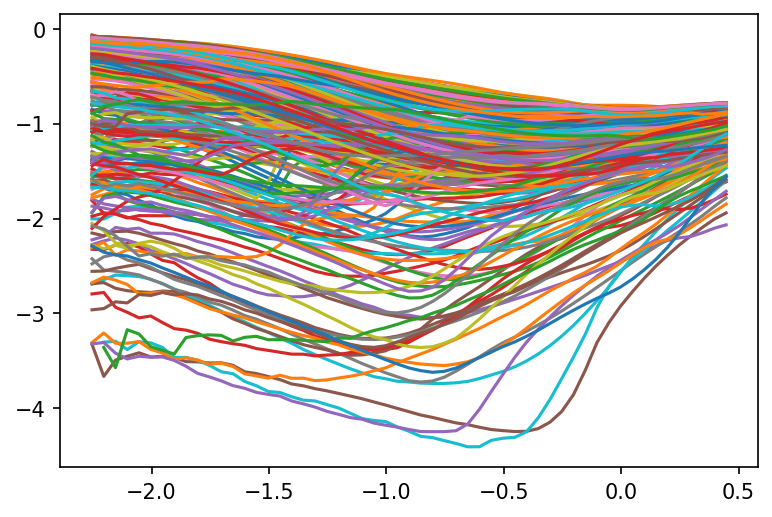

In [71]:
plt.figure(dpi=150)
fb_05 = []
fb_1 = []
fb_2 = []
fb_3 = []

Mvir = []

for profile in profiles:
    if 'SnapNum045' not in profile:
        continue
    particle_types_num=[0,4]
    particle_types=[0,1,2,4,5]
    profile = profile['SnapNum045']

    totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
    nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
    with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)#/cosmological_baryon_budget
    
    fb_05.append(fbarr[39])
    fb_1.append(fbarr[45])
    fb_2.append(fbarr[51])
    fb_3.append(fbarr[54])
    Mvir.append(profile['Mvir'])
    
    plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')

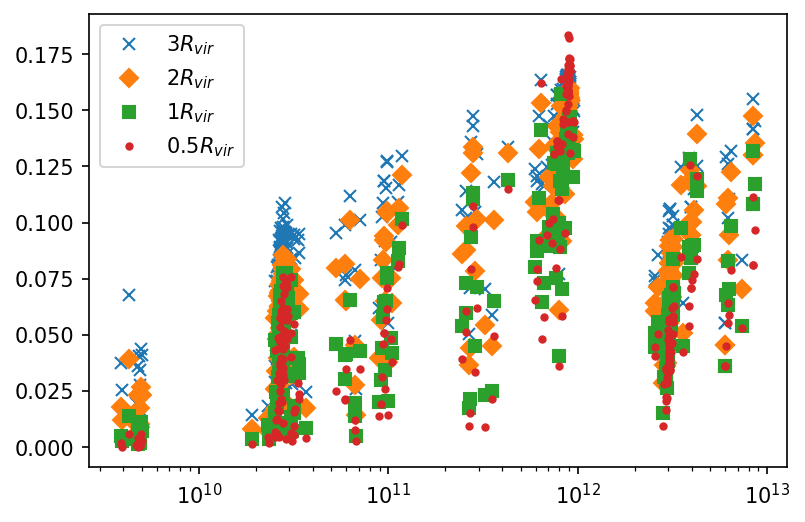

In [77]:
plt.figure(dpi=150)

plt.plot(Mvir, fb_3, 'x', label='$3 R_{vir}$')
plt.plot(Mvir, fb_2, 'D', label='$2 R_{vir}$')
plt.plot(Mvir, fb_1, 's', label='$1 R_{vir}$')
plt.plot(Mvir, fb_05, '.', label='$0.5 R_{vir}$')

# plt.axhline(1, ls='--', c='k', zorder=-1)
# plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.xscale('log')
plt.legend()

In [3]:
def simstr(params):
    return '_'.join([ params[k] for k in ['fb_method', 'v_wind', 'cr_loading', 'fluxmom_factor', 'alpha_disk_factor', 'gravaccretion_model', 'accretion_factor'] ])

In [4]:
def model_match(simname, halos):
    halos_str = [simstr(params_from_filename(h)) if len(h.split('_'))>3 else None for h in halos]
    model1 = [i for i,hs in enumerate(halos_str) if hs==simstr(params_from_filename(simname))]
    return model1

In [22]:
def fbary_model(model1, profiles, SnapNum='SnapNum045', particle_types_num=[0,4], particle_types=[0,1,2,4,5]):
    fb_05 = []
    fb_1 = []
    fb_2 = []
    fb_3 = []

    Mvir = []
    for i in model1:
        if SnapNum not in profiles[i]:
            print('Missing SnapNum', SnapNum, halos[i])
            continue
        profile = profiles[i][SnapNum]

        totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)#/cosmological_baryon_budget

        fb_05.append(fbarr[39])
        fb_1.append(fbarr[45])
        fb_2.append(fbarr[51])
        fb_3.append(fbarr[54])
        Mvir.append(profile['Mvir'])
        
#         plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')
    return Mvir, fb_05, fb_1, fb_2, fb_3

In [71]:
models = ['m13h206_m5e4_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp1e-3_mw7e-8_fa0.5_tw1e4_fmom1',
         'm13h113_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp4e-3_mw4e-7_fa0.5_tw1e4_fmom1',
         'm13h113_m3e5_spawn_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp4e-3_mw4e-7_fa0.5_tw1e4_fmom1',
         'm13h113_m3e5_push_alpha10_gacc30_accf1_vw42500_cr1e-6_msd1e-8_sdp4e-3_mw1e-8_fa0.5_tw1e4_fmom1',
         'm13h113_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp4e-3_mw1e-8_fa0.5_tw1e4_fmom100']
plt.figure(dpi=150)
for simname in models:
    fbary_model(model_match(simname, halos), profiles);

Missing SnapNum SnapNum045 m13h206_m5e4_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp2e-3_mw7e-8_fa0.5_tw1e4_fmom1


<Figure size 900x600 with 0 Axes>

Missing SnapNum SnapNum045 m13h206_m5e4_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp2e-3_mw7e-8_fa0.5_tw1e4_fmom1
Missing SnapNum SnapNum277 m11f_noAGNfb
Missing SnapNum SnapNum277 m11h_noAGNfb
Missing SnapNum SnapNum277 m11b_noAGNfb


Text(0.045, 0.5, '$f_{b}$')

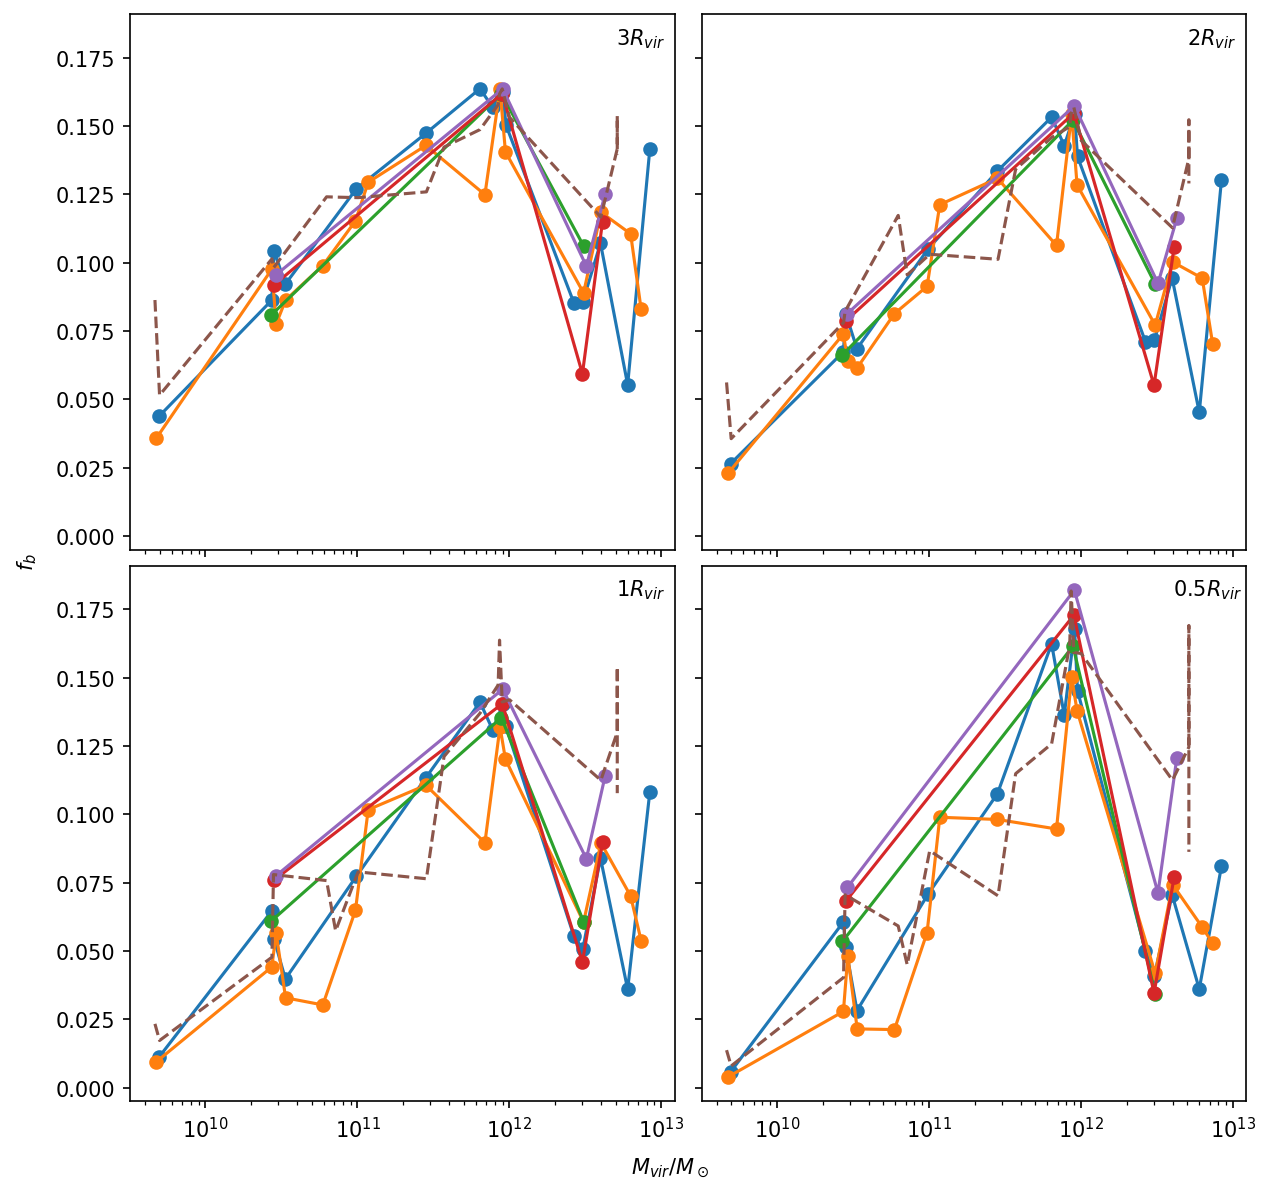

In [83]:
flabel='b'
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*2,4.8*2], dpi=150, facecolor='w')

for simname in models:
    Mvir, fb_05, fb_1, fb_2, fb_3 = fbary_model(model_match(simname, halos), profiles)

    axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], 'o-', label='$3 R_{vir}$')
    axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], 'o-', label='$2 R_{vir}$')
    axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], 'o-', label='$1 R_{vir}$')
    axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], 'o-', label='$0.5 R_{vir}$')

Mvir, fb_05, fb_1, fb_2, fb_3 = fbary_model([i for i,hs in enumerate(halos) if 'noAGN' in hs], profiles, SnapNum='SnapNum277', particle_types=[0,1,2,4])
axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], '--', label='$3 R_{vir}$')
axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], '--', label='$2 R_{vir}$')
axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], '--', label='$1 R_{vir}$')
axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], '--', label='$0.5 R_{vir}$')

axes[0,0].text(5e12, 0.18, '$3 R_{vir}$')
axes[0,1].text(5e12, 0.18, '$2 R_{vir}$')
axes[1,0].text(5e12, 0.18, '$1 R_{vir}$')
axes[1,1].text(4e12, 0.18, '$0.5 R_{vir}$')

# plt.axhline(1, ls='--', c='k', zorder=-1)
# plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.xscale('log')

# plt.xlabel(r'$\log (r/R_{vir})$')
fig.text(0.5, 0.075, '$M_{vir}/M_\odot$', ha='center')
fig.text(0.045, 0.5, f'$f_{{{flabel}}}$', va='center', rotation='vertical')

Missing SnapNum SnapNum277 m11f_noAGNfb
Missing SnapNum SnapNum277 m11h_noAGNfb
Missing SnapNum SnapNum277 m11b_noAGNfb


([array(6.2635962e+10, dtype=float32),
  array(3.9939652e+12, dtype=float32),
  array(2.7360883e+10, dtype=float32),
  array(8.965487e+11, dtype=float32),
  array(5.1200603e+12, dtype=float32),
  array(2.8019132e+10, dtype=float32),
  array(2.8420823e+11, dtype=float32),
  array(8.423322e+11, dtype=float32),
  array(4.9859845e+09, dtype=float32),
  array(8.605276e+11, dtype=float32),
  array(1.00167215e+12, dtype=float32),
  array(5.120496e+12, dtype=float32),
  array(4.6493414e+09, dtype=float32),
  array(1.0094092e+11, dtype=float32),
  array(3.7115888e+11, dtype=float32),
  array(7.179283e+10, dtype=float32),
  array(5.121392e+12, dtype=float32),
  array(6.4e+11, dtype=float32)],
 [0.059158713,
  0.11250279,
  0.040320043,
  0.15922144,
  0.12457791,
  0.070569605,
  0.07019765,
  0.16189471,
  0.007951867,
  0.18171275,
  0.15883581,
  0.1690856,
  0.013726491,
  0.08668863,
  0.11488034,
  0.044948284,
  0.08627124,
  0.12578914],
 [0.07576726,
  0.11248267,
  0.047730267,
  0.141